<a href="https://colab.research.google.com/github/kshashank03/data-science-projects/blob/master/Regression_Models/California_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###*** Download packages for Basemap ***###
'''
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
'''

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
dataset_path = "/content/drive/My Drive/Data Science/1990 California Housing/housing.csv"

dataset = pd.read_csv(dataset_path)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_data = dataset.copy()
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


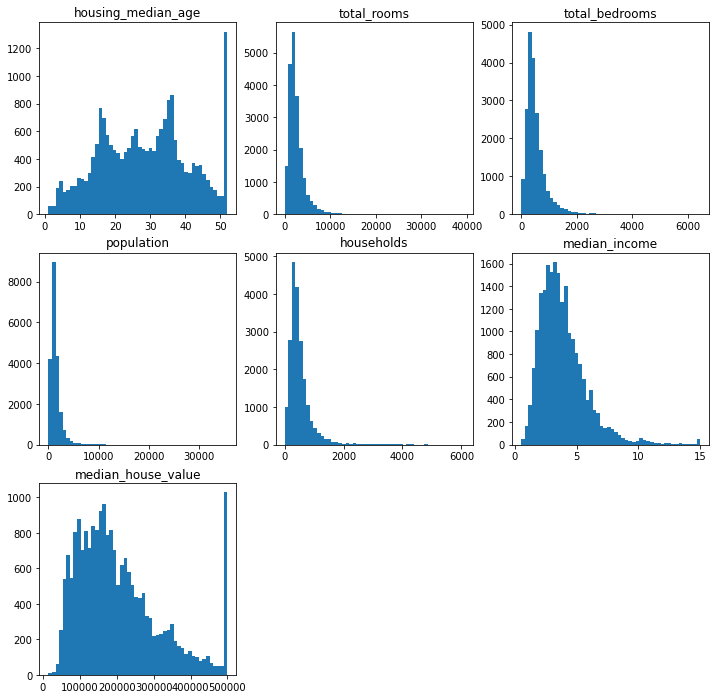

In [5]:
hist_data = housing_data.copy()
hist_data = housing_data.loc[:, ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]

plt.figure(figsize=(12, 12))

for i in range(1, 8):
  plt.subplot(3, 3, i)
  plt.hist(hist_data.iloc[:, i-1], bins=50)
  plt.title(hist_data.columns[i - 1])



In [6]:
map_data = housing_data.copy()
lat = map_data['latitude'].values
lon = map_data['longitude'].values
housing_price = np.log10(map_data['median_house_value']) * 5

map_data = map_data.loc[:, ["latitude", "longitude", "median_house_value", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]]
map_data

,latitude,longitude,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.88,-122.23,452600.0,41.0,880.0,129.0,322.0,126.0,8.3252
1,37.86,-122.22,358500.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,37.85,-122.24,352100.0,52.0,1467.0,190.0,496.0,177.0,7.2574
3,37.85,-122.25,341300.0,52.0,1274.0,235.0,558.0,219.0,5.6431
4,37.85,-122.25,342200.0,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,78100.0,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,39.49,-121.21,77100.0,18.0,697.0,150.0,356.0,114.0,2.5568
20637,39.43,-121.22,92300.0,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,39.43,-121.32,84700.0,18.0,1860.0,409.0,741.0,349.0,1.8672


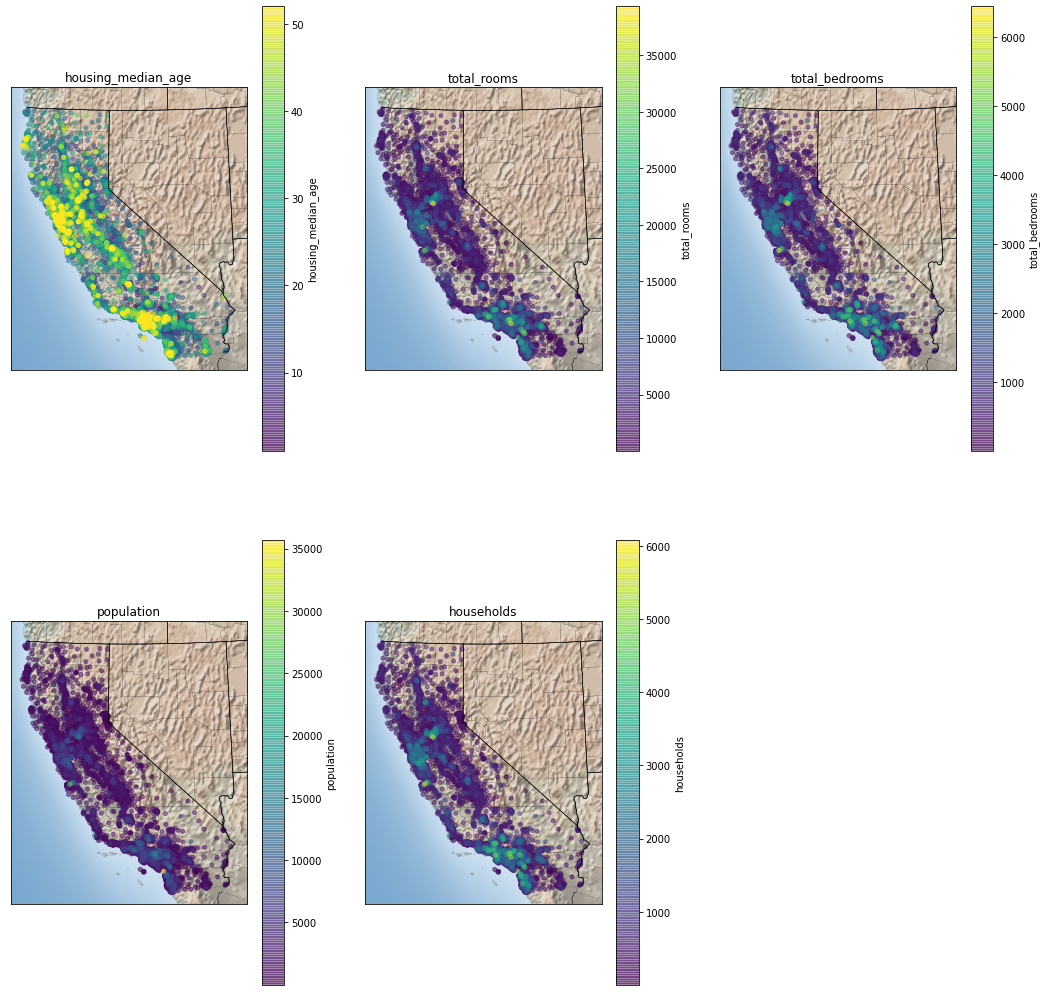

In [19]:
fig = plt.figure(figsize=(18, 18))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)

for i in range(4, len(map_data.columns)):
  plt.subplot(2, 3, i - 3)
  plt.title(map_data.columns[i - 1])
  map_data2 = map_data.copy()
  map_data2.sort_values(by=[map_data2.columns[i - 1]], ascending= True, inplace=True)
  m.shadedrelief()
  m.drawcounties(color='k')
  m.drawstates(color='black')
  m.scatter(map_data2['longitude'].values, map_data2['latitude'].values, latlon=True,
          c=map_data2.iloc[:,i - 1], s=np.log2(map_data2['median_house_value'].values), 
          cmap='viridis', alpha=0.5)
  plt.colorbar(label=map_data2.columns[i - 1])
  plt.clim(1, max(map_data2.iloc[:,i - 1]))